In [1]:
import random
import copy

In [2]:
import numpy as np

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
Graphs = []


In [5]:
while len(Graphs) < 50:
    G = nx.cycle_graph(50)
    steps = 0
    
    #print(len(Graphs))
    no_of_edges = 0
    while steps < 100 :
        #print(steps)
        r1 = random.randrange(0,50)
        d1 = G.degree[r1]

        if d1<3:
            # lower bound inclusive & upper bound not inclusive in range
            # r2 = random.sample(range(r1-5,r1-1), 4)   
            l1 = [*range(r1-5,r1-1,1)]
            # lower bound inclusive & upper bound not inclusive in range
            # r3 = random.sample(range(r1+2,r1+6), 4)
            l2 = [*range(r1+2,r1+6,1)]
            joinedList = l1 + l2
            for i in range(8):
                if joinedList[i] < 0:
                    joinedList[i] += 50
                elif joinedList[i] > 49:
                    joinedList[i] -= 50
            edge_added = False
            stepss = 0
            while edge_added == False and stepss < 50:
                r2 = random.choice(joinedList)
                d2 = G.degree[r2]
                if d2<3:
                    edge_added = True
                    no_of_edges += 1
                    G.add_edge(r1,r2)
                stepss += 1
        steps += 1
    #print(no_of_edges)
    Graphs.append(G)
    

In [58]:
def BFS(G, start, finish):
    #print("SF", start, finish)
    vis = [0] * 50
    q = [[start, 0]]
    #path = list()
    vis[start] = 1
    dis = 0
    #new_path = -1
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        node =  q.pop(0)
        #print("path" , path)
        #node = path[-1]
        #print("node " , node)
        #print("q", q)
        if node[0] == finish :
            return node[1]
        for j in G[node[0]]:
            if vis[j] != 1:
                q.append([j, node[1] + 1])
                vis[j] = 1

In [7]:
def init_rand_pos():
    prey = random.randint(0, 49)
    pred = random.randint(0, 49)

    agent = random.randint(0, 49)
    while agent == prey or agent == pred:
        agent = random.randint(0, 49)
    return (prey, pred, agent) 

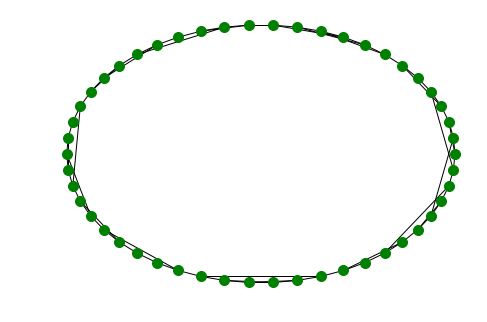

In [8]:
nx.draw_circular(Graphs[42], scale = 1, node_size=100, node_color='green')
plt.draw()

In [43]:
def move_prey(G, prey):
    move = random.randint(0, G.degree(prey))
    if move == 0:
        return prey
    else:
        return [i for i in G.neighbors(prey)][move-1]

In [117]:
def move_pred(G, pred, agent):
    min_ad = 100
    dis_pred = []
    dis_pred_choice = []
    
    for i in G[pred]:
        agent_dis = BFS(G, i, agent)
        dis_pred.append([i, agent_dis])
        if agent_dis < min_ad:
            min_ad = agent_dis
    
    for i in range(len(dis_pred)):
        if min_ad == dis_pred[i][1]:
            dis_pred_choice.append(dis_pred[i][0])
            
    return random.choice(dis_pred_choice)

In [47]:
def next_pos_agent(dis):
    min_yd = 100
    max_dd = -1
    nextpos_agent_choice = []
    nextpos_agent_temp = []
    for i in range(len(dis)):
        if dis[i][1] <= min_yd:
            min_yd = dis[i][1]
            
    for i in range(len(dis)):
        if dis[i][1] == min_yd:
            nextpos_agent_temp.append(dis[i])
    
    for i in range(len(nextpos_agent_temp)):
        if nextpos_agent_temp[i][2] > max_dd:
            max_dd = nextpos_agent_temp[i][2]
    
    for i in range(len(nextpos_agent_temp)):
        if nextpos_agent_temp[i][2] == max_dd:
            nextpos_agent_choice.append(nextpos_agent_temp[i])
    
    return random.choice(nextpos_agent_choice)

In [59]:
BFS(G, 1, 23)

13

# Agent 1

In [118]:
success = 0
fail1 = 0
fail2 = 0
for j in range(50):  
    print(j)
    G = Graphs[j]
    for runs in range(100):
        prey, pred, agent = init_rand_pos()
        #print("RUN #", runs)
        #print(prey, pred, agent)
        time = 0
        while time < 1000:
            min_yd = 100
            max_dd = -1
            x = BFS(G, agent, pred)
            y = BFS(G, agent, prey)
            #print("xy", x, y)
            dis = []
            select = False
            for i in G[agent]:
                #print("i", i)
                prey_dis = BFS(G, i, prey)
                #print("prey_dis", prey_dis)
                pred_dis = BFS(G, i, pred)
                
                if prey_dis < y and pred_dis > x:
                    select = True
                elif prey_dis < y  and pred_dis == x:
                    select = True
                elif prey_dis == y and pred_dis > x:
                    select = True
                elif prey_dis == y and pred_dis == x:
                    select = True
                elif pred_dis > x:
                    select = True
                elif pred_dis == x:
                    select = True
                
                if select == True:
                    dis.append([i, prey_dis, pred_dis])
                
            #print(dis)
            
            if bool(dis) != False:
                agent = next_pos_agent(dis)[0] 
                
                    
            #print("next_pos", next_pos)       
            if agent == prey:
                break
    
            prey = move_prey(G, prey)
            pred = move_pred(G, pred, agent)
            #print(prey, pred, agent)
            if agent == prey  or agent == pred:
                break
            time += 1
            #print("time",time)
        if agent == pred:
            fail1 += 1
        elif agent == prey:
            success += 1
        elif time == 1000:
            fail2 += 1
        
success/5000, fail1/5000, fail2/5000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(0.7872, 0.2128, 0.0)

# Agent 2

In [76]:
def BFSwPred(G, start, finish, pred):
    vis = [0] * 50
    q = [[start, 0]]
    #path = list()
    vis[start] = 1
    vis[pred] = 1
    dis = 0
    #new_path = -1
    #q.append(list([0,0]))
    #print(q)
    while len(q) != 0:
        node =  q.pop(0)
        #print("path" , path)
        #node = path[-1]
        #print("node " , node)
        if node[0] == finish :
            return node[1]
        for i in G[node[0]]:
            if vis[i] != 1:
                q.append([i, node[1] + 1])
                vis[i] = 1

In [75]:
prey, pred, agent

(41, 46, 46)

In [119]:
success = 0
fail1 = 0
fail2 = 0
for j in range(50):  
    print(j)
    G = Graphs[j]
    for runs in range(100):
        prey, pred, agent = init_rand_pos()
        #print("RUN #", runs)
        #print(prey, pred, agent)
        time = 0
        while time < 1000:
            #min_yd = 100
            #max_dd = -1
            x = BFS(G, agent, pred)
            y = BFS(G, agent, prey)
            select = False
            dis = []
            for i in G[agent]:
                prey_dis = BFSwPred(G, i, prey, pred)
                #print("prey_dis", prey_dis)
                if prey_dis == None:
                    break
                pred_dis = BFS(G, i, pred)
                if prey_dis < y and pred_dis > x:
                    select = True
                elif prey_dis < y  and pred_dis == x:
                    select = True
                elif prey_dis == y and pred_dis > x:
                    select = True
                elif prey_dis == y and pred_dis == x:
                    select = True
                elif pred_dis > x:
                    select = True
                elif pred_dis == x:
                    select = True
                
                if select == True:
                    dis.append([i, prey_dis, pred_dis])
                
            #print(dis)
            
            if bool(dis) != False:
                agent = next_pos_agent(dis)[0] 
                
                    
            #print("next_pos", next_pos)       
            if agent == prey:
                break
    
            prey = move_prey(G, prey)
            pred = move_pred(G, pred, agent)
            #print(prey, pred, agent)
            if agent == prey  or agent == pred:
                break
            time += 1
            #print("time",time)
        if agent == pred:
            fail1 += 1
        elif agent == prey:
            success += 1
        elif time == 1000:
            fail2 += 1
        
success/5000, fail1/5000, fail2/5000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(0.8532, 0.1468, 0.0)

# Agent 3

In [12]:
def init_belief(agent):
    belief = [1/49] * 50
    belief[agent] = 0
    return belief

In [13]:
def found(survey_node, belief):
    belief = [0] * 50
    belief[survey_node] = 1
    return belief

In [14]:
def not_found(belief, G, survey_node):

    for i in range(50):
        if(i != survey_node):
            belief[i] = belief[i]/(1-belief[survey_node])
        
    belief[survey_node] = 0
    return belief

In [124]:
def move_prey_belief(belief, G):
    belief_new = [0] * 50
    for i in range(50):
        for j in G[i]:
            belief_new[i] += belief[j] * (1/(G.degree(j)+1))
        belief_new[i] += belief[i] * (1/(G.degree(i)+1))
    return belief_new
            

In [98]:
def certain(belief):
    count = 0
    for i in range(50):
        if belief[i] == 1:
            count += 1
    return count == 1 

In [123]:
def max_belief(belief, agent):
    max_value = max(belief)
    choice =  []
    for i in range(50):
        if belief[i] == max_value:
            choice.append(i)
    return random.choice(choice)

In [120]:
success = 0
fail1 = 0
fail2 = 0
for j in range(50):  
    print(j)
    G = Graphs[j]
    for runs in range(100):
        prey, pred, agent = init_rand_pos()
        #print("RUN #", runs)
        #print("init", prey, pred, agent)
        belief = init_belief(agent)    
        time = 0
        while time < 1000: 
            if certain(belief) != True:
                survey_node = max_belief(belief, agent)
            
                #print("survey_node", survey_node)

                #print("before", belief, sum(belief))
                if prey == survey_node:
                    belief = found(survey_node, belief)
                else:
                    belief = not_found(belief, G, survey_node)
            
                
            #print("after survey", belief, sum(belief))
            prey_belief = max_belief(belief, agent)
            #print("prey_belief", prey_belief)
            select = False
            dis = []
            x = BFS(G, agent, pred)
            y = BFS(G, agent, prey_belief)
            for i in G[agent]:
                #print("i", i)
                
                prey_dis = BFS(G, i, prey_belief)
                #print("prey_dis", prey_dis)
                pred_dis = BFS(G, i, pred)

                
                if prey_dis < y and pred_dis > x:
                    select = True
                elif prey_dis < y  and pred_dis == x:
                    select = True
                elif prey_dis == y and pred_dis > x:
                    select = True
                elif prey_dis == y and pred_dis == x:
                    select = True
                elif pred_dis > x:
                    select = True
                elif pred_dis == x:
                    select = True
                
                if select == True:
                    dis.append([i, prey_dis, pred_dis])
                
            #print(dis)
            
            if bool(dis) != False:
                agent = next_pos_agent(dis)[0] 
                
                    
            #print("next_pos", next_pos)       
            if agent == prey or agent == pred:
                break
            
            belief = not_found(belief, G, agent)
            
            prey = move_prey(G, prey)
            belief = move_prey_belief(belief, G)
            
            #print("trans", belief, sum(belief))
            pred = move_pred(G, pred, agent)
            #print("move", prey, pred, agent)
            
            if agent == prey  or agent == pred:
                break
            
            time += 1
            #print("time",time)
        if agent == pred:
            fail1 += 1
        elif agent == prey:
            success += 1
        elif time == 1000:
            fail2 += 1
        
success/5000, fail1/5000, fail2/5000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(0.389, 0.611, 0.0)

In [107]:
Graphs[9][20]

AtlasView({19: {}, 21: {}, 24: {}})

In [176]:
len([n for n in G.neighbors(47)])+1

4

# Agent 4

In [121]:
success = 0
fail1 = 0
fail2 = 0
for j in range(50):  
    print(j)
    G = Graphs[j]
    for runs in range(100):
        prey, pred, agent = init_rand_pos()
        #print("RUN #", runs)
        #print("init", prey, pred, agent)
        belief = init_belief(agent)    
        time = 0
        while time < 1000: 
            if certain(belief) != True:
                survey_node = max_belief(belief, agent)
            
                #print("survey_node", survey_node)

                #print("before", belief, sum(belief))
                if prey == survey_node:
                    belief = found(survey_node, belief)
                else:
                    belief = not_found(belief, G, survey_node)
            
                
            #print("after survey", belief, sum(belief))
            prey_belief = max_belief(belief, agent)
            #print("prey_belief", prey_belief)
            select = False
            dis = []
            x = BFS(G, agent, pred)
            y = BFS(G, agent, prey_belief)
            for i in G[agent]:
                #print("i", i)
                
                prey_dis = BFSwPred(G, i, prey, pred)
                #print("prey_dis", prey_dis)
                if prey_dis == None:
                    break
                #print("prey_dis", prey_dis)
                pred_dis = BFS(G, i, pred)

                
                if prey_dis < y and pred_dis > x:
                    select = True
                elif prey_dis < y  and pred_dis == x:
                    select = True
                elif prey_dis == y and pred_dis > x:
                    select = True
                elif prey_dis == y and pred_dis == x:
                    select = True
                elif pred_dis > x:
                    select = True
                elif pred_dis == x:
                    select = True
                
                if select == True:
                    dis.append([i, prey_dis, pred_dis])
                
            #print(dis)
            
            if bool(dis) != False:
                agent = next_pos_agent(dis)[0] 
                
                    
            #print("next_pos", next_pos)       
            if agent == prey or agent == pred:
                break
            
            belief = not_found(belief, G, agent)
            
            prey = move_prey(G, prey)
            belief = move_prey_belief(belief, G)
            
            #print("trans", belief, sum(belief))
            pred = move_pred(G, pred, agent)
            #print("move", prey, pred, agent)
            
            if agent == prey  or agent == pred:
                break
            
            time += 1
            #print("time",time)
        if agent == pred:
            fail1 += 1
        elif agent == prey:
            success += 1
        elif time == 1000:
            fail2 += 1
        
success/5000, fail1/5000, fail2/5000

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(0.7712, 0.2288, 0.0)

# Agent 5

In [ ]:
def move_pred_belief(G, belief):
    distracted = random.r
    pred 